# K-Means clustering with the iris dataset

In [ ]:
#This is a simple clustering exercise using the iris dataset and sklearn's KMeans clustering.
#The purpose is to practice using K-Means on a simple dataset which should give an accurate clustering.

In [1]:
#Dependencies:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn.metrics import classification_report

In [2]:
#Loading the data and seperating it into features and target variables.
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)

In [3]:
#Fitting the model, we use 3 clusters because there are 3 species.

clustering = KMeans(n_clusters = 3, random_state = 5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [5]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']
print(iris_df.head())

   Sepal_length  Sepal_width  Petal_length  Petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [39]:
#Arranging the data nicely so we can begin to visualise it.
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']
y.columns = ['Target']
iris_df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Visualisation

Text(0.5, 1.0, 'K-Means Clustering')

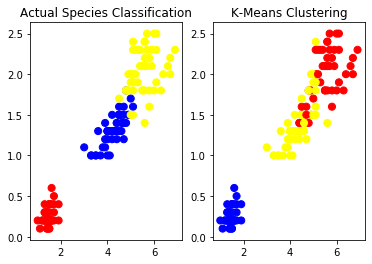

In [35]:
#Lets draw some scatter plots to have a look at how well our model has clustered the data compared to the actual classification.
#We'll compare petal and sepal size seperately, petals first.

colour_theme = np.array(['red','blue','yellow'])

#First we plot the points coloured as they are classified by species.
plt.subplot(1,2,1)
plt.scatter(iris_df.Petal_length, iris_df.Petal_width, c = colour_theme[iris.target], s = 50)
plt.title('Actual Species Classification')

#Secondly coloured by our clustering model.
plt.subplot(1,2,2)
plt.scatter(iris_df.Petal_length, iris_df.Petal_width, c = colour_theme[clustering.labels_], s = 50)
plt.title('K-Means Clustering')

In [36]:
#Ok so we can see the model has clustered very well, however the labels are incorrect, we need to swap these around.
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)

Text(0.5, 1.0, 'K-Means Clustering')

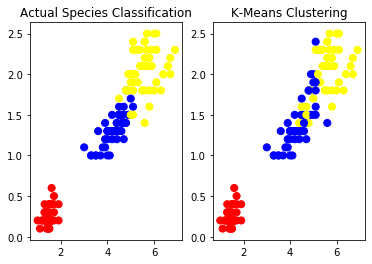

In [37]:
#Now we replot.
plt.subplot(1,2,1)
plt.scatter(iris_df.Petal_length, iris_df.Petal_width, c = colour_theme[iris.target], s = 50)
plt.title('Actual Species Classification')

plt.subplot(1,2,2)
plt.scatter(iris_df.Petal_length, iris_df.Petal_width, c = colour_theme[relabel], s = 50)
plt.title('K-Means Clustering')

Text(0.5, 1.0, 'K-Means Clustering')

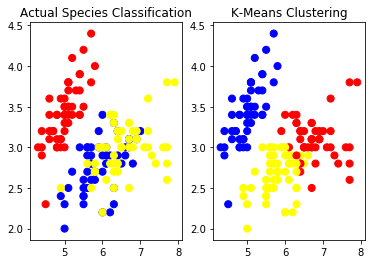

In [40]:
#This time we can see clearly that our clustering is pretty accurate, although not perfect, there are some obvious outliers.
#Now lets plot sepal size.
colour_theme = np.array(['red','blue','yellow'])

#First we plot the points coloured as they are classified by species.
plt.subplot(1,2,1)
plt.scatter(iris_df.Sepal_length, iris_df.Sepal_width, c = colour_theme[iris.target], s = 50)
plt.title('Actual Species Classification')

#Secondly coloured by our clustering model.
plt.subplot(1,2,2)
plt.scatter(iris_df.Sepal_length, iris_df.Sepal_width, c = colour_theme[clustering.labels_], s = 50)
plt.title('K-Means Clustering')

Text(0.5, 1.0, 'K-Means Clustering')

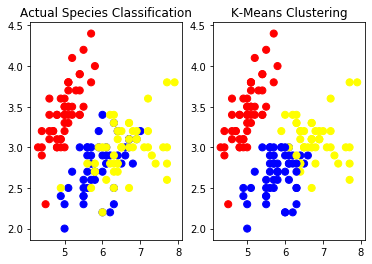

In [42]:
#Again we need to relabel.
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
#First we plot the points coloured as they are classified by species.
plt.subplot(1,2,1)
plt.scatter(iris_df.Sepal_length, iris_df.Sepal_width, c = colour_theme[iris.target], s = 50)
plt.title('Actual Species Classification')

#Secondly coloured by our clustering model.
plt.subplot(1,2,2)
plt.scatter(iris_df.Sepal_length, iris_df.Sepal_width, c = colour_theme[relabel], s = 50)
plt.title('K-Means Clustering')

In [ ]:
#Again we see some promising results, lets perform a test to evaluate the model mathematically.

In [38]:
print(classification_report(y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [ ]:
#Excellent! We see high precision and high recall confirming what we already know, that this is a strong clustering.
#It is unsuprising really, as this dataset is very easy to work with and produces nice clusters.
#Next I will find and cluster my own dataset which should hopefully be more challenging.